# Predicting Titanic survival

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Users/Victor/Documents/Python Courses")

### Import data

In [760]:
train_data=pd.read_csv("Data/titanic/train.csv")
test_data=pd.read_csv("Data/titanic/test.csv")
datasets=[train_data,test_data]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore data

In [606]:
train_data.info()
#Variables with missing values: Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [607]:
#Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [608]:
train_data.describe()
#38% survival rate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


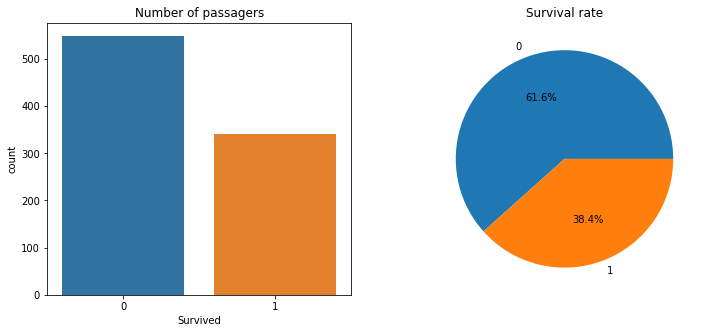

In [609]:
f,ax=plt.subplots(1,2, figsize=(12,5))

sns.countplot('Survived',data=train_data,ax=ax[0]);
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])

ax[0].title.set_text('Number of passagers')
ax[1].axis('off')
ax[1].title.set_text('Survival rate')

### Feature Correlation

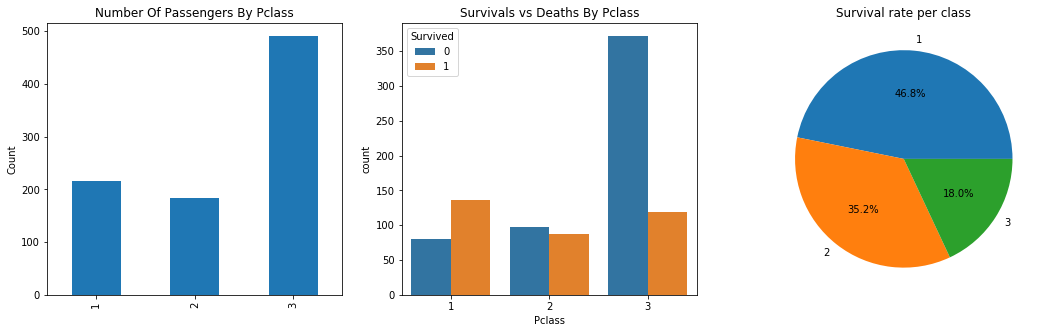

In [620]:
#Pclass vs Survival
f,ax=plt.subplots(1,3, figsize=(18,5))

train_data['Pclass'].value_counts().sort_index().plot.bar(ax=ax[0])
sns.countplot('Pclass',data=train_data, hue='Survived', ax=ax[1])
train_data[['Survived','Pclass']].groupby(['Pclass']).mean().plot.pie(y='Survived',autopct='%1.1f%%',legend=False,ax=ax[2])

ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
ax[1].set_title('Survivals vs Deaths By Pclass')
ax[2].axis('off')
ax[2].title.set_text('Survival rate per class')
plt.show()

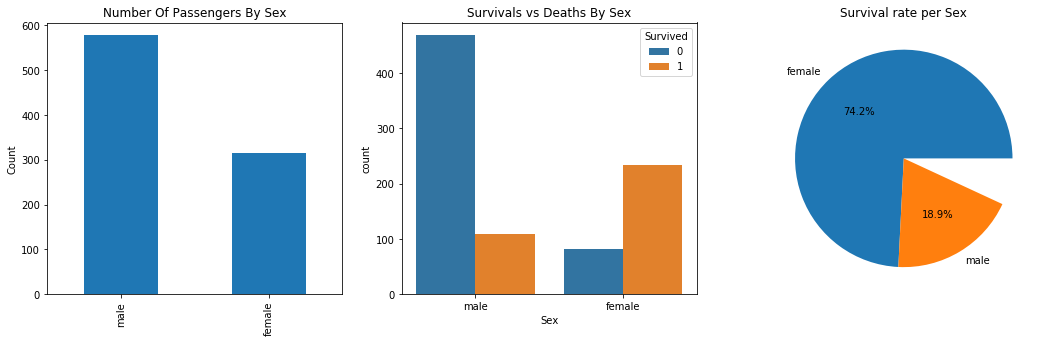

In [621]:
#Sex vs Survival
f,ax=plt.subplots(1,3, figsize=(18,5))
train_data['Sex'].value_counts().plot.bar(ax=ax[0])
sns.countplot('Sex',hue='Survived',data=train_data, ax=ax[1])
train_data[['Survived','Sex']].groupby(['Sex']).mean().plot.pie(y='Survived',autopct='%1.1f%%',legend=False,ax=ax[2])

ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('Count')
ax[1].set_title('Survivals vs Deaths By Sex')
ax[2].axis('off')
ax[2].title.set_text('Survival rate per Sex')
plt.show()

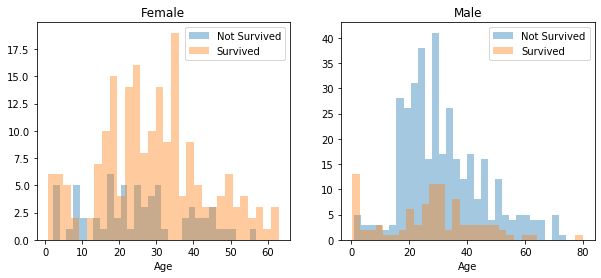

In [658]:
f,ax=plt.subplots(1,2, figsize=(10,4))
sns.distplot(train_data[(train_data['Sex']=='female') & (train_data['Survived']==0)]['Age'],bins=30,label='Not Survived',kde=False,ax=ax[0])
sns.distplot(train_data[(train_data['Sex']=='female') & (train_data['Survived']==1)]['Age'],bins=30,label='Survived',kde=False,ax=ax[0])
sns.distplot(train_data[(train_data['Sex']=='male') & (train_data['Survived']==0)]['Age'],bins=30,label='Not Survived',kde=False,ax=ax[1])
sns.distplot(train_data[(train_data['Sex']=='male') & (train_data['Survived']==1)]['Age'],bins=30,label='Survived',kde=False,ax=ax[1])

ax[0].set_title('Female')
ax[0].legend()
ax[1].set_title('Male')
ax[1].legend()
plt.show()

#Survivability in men decreases with an increase in age.

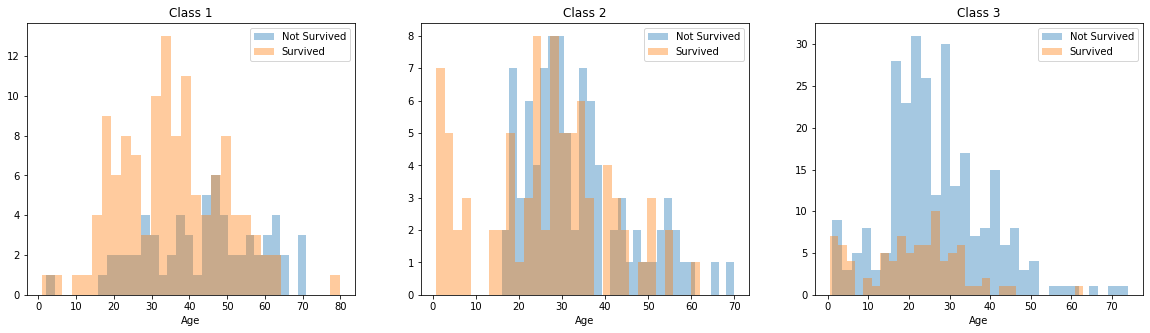

In [666]:
#Passagers aged 11-40 from class 1 have a significantly higher survival chance.
f,ax=plt.subplots(1,3, figsize=(20,5))
sns.distplot(train_data[(train_data['Pclass']==1) & (train_data['Survived']==0)]['Age'],bins=30,label='Not Survived',kde=False,ax=ax[0])
sns.distplot(train_data[(train_data['Pclass']==1) & (train_data['Survived']==1)]['Age'],bins=30,label='Survived',kde=False,ax=ax[0])
sns.distplot(train_data[(train_data['Pclass']==2) & (train_data['Survived']==0)]['Age'],bins=30,label='Not Survived',kde=False,ax=ax[1])
sns.distplot(train_data[(train_data['Pclass']==2) & (train_data['Survived']==1)]['Age'],bins=30,label='Survived',kde=False,ax=ax[1])
sns.distplot(train_data[(train_data['Pclass']==3) & (train_data['Survived']==0)]['Age'],bins=30,label='Not Survived',kde=False,ax=ax[2])
sns.distplot(train_data[(train_data['Pclass']==3) & (train_data['Survived']==1)]['Age'],bins=30,label='Survived',kde=False,ax=ax[2])

ax[0].set_title('Class 1')
ax[0].legend()
ax[1].set_title('Class 2')
ax[1].legend()
ax[2].set_title('Class 3')
ax[2].legend()
plt.show()



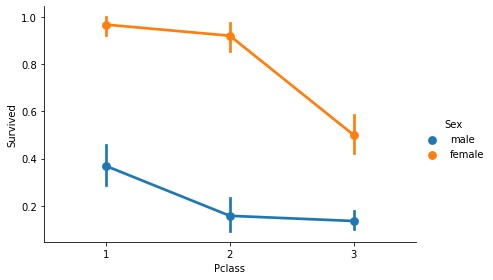

In [686]:
#Females from class 1 and 2 have a greater survival chance than females from class 3.
#Males from class 1 have a greater survival chance than males from class 2 and 3.

sns.catplot('Pclass','Survived',kind='point',hue='Sex',data=train_data, aspect=1.5, height=4)
plt.show()

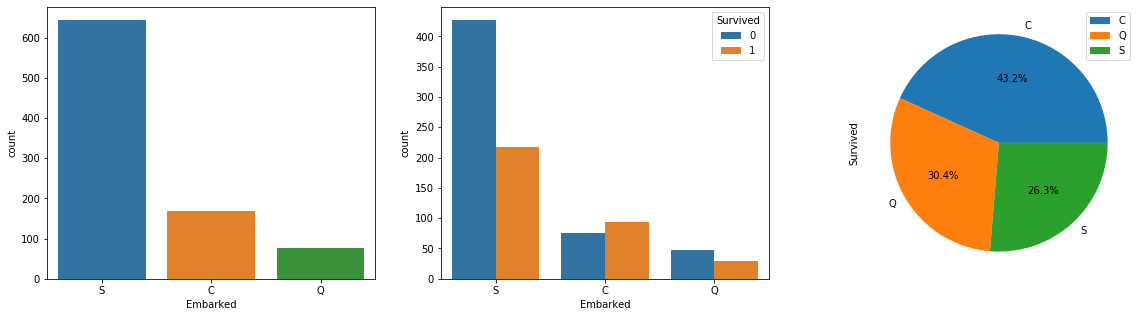

In [659]:
f,ax=plt.subplots(1,3, figsize=(20,5))
sns.countplot(x='Embarked',data=train_data,ax=ax[0])
sns.countplot(x='Embarked',hue='Survived',data=train_data,ax=ax[1])
train_data.groupby('Embarked').mean().plot.pie(y='Survived',autopct='%1.1f%%', ax=ax[2])
plt.show()

In [660]:
#Children (age 0-10) from class 1 and 2 are close to 100% survival rate.
train_data[['Survived','Pclass']][train_data['Age']<=10].groupby(by='Pclass').agg({'Survived':['count','sum','mean']})

Survived              
          count sum      mean
Pclass                       
1             3   2  0.666667
2            17  17  1.000000
3            44  19  0.431818

In [527]:
#Sex has a no influence on the survivability among children.
train_data[['Survived','Sex']][train_data['Age']==1].groupby(by='Sex').agg({'Survived':['count','sum','mean']})

Survived              
          count sum      mean
Sex                          
female       31  19  0.612903
male         33  19  0.575758

Conclusions:

- Children (age 0-10) from class 1 and 2 are close to 100% survival rate.
- Sex has a no influence on the survivability among children.
- Passagers aged 11-40 from class 1 have a significantly higher survival chance.
- Survivability in men decreases with an increase in age.
- Females from class 1 and 2 have a greater survival chance than females from class 3.
- Males from class 1 have a greater survival chance than males from class 2 and 3.

Presumably, the order in which people embarked in the live boats is the following:

<ol>
<li>Children aged 0-10 from class 1 and 2 (almost 100%)</li>
<li>Females from class 1 and 2 (around 95%)</li>
<li>Females from class 3 (around 50%)</li>
<li>Males from class 1 aged 11-40 (around 50%)</li>
<li>Children aged 0-10 from class 3 (43%)</li>
<li>Males from class 1 over the age of 40 (around 26%)</li>
<li>Rest of Males from class 2 and 3 (around 10-15%)</li>
</ol>

### Data processing

In [761]:
#Convert Sex to number

for dataset in datasets:
    dataset['Sex']=dataset['Sex'].map({'male':1, 'female':0})
    dataset['Sex']=dataset['Sex'].astype(int)

In [762]:
#Extract title from name
for dataset in datasets:
    dataset['Title']=dataset.Name.str.extract('([a-zA-Z]+)\.')

train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Capt          1
Countess      1
Don           1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Name: Title, dtype: int64

In [763]:
#Replace rare titles

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in datasets:
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Lady','Miss')

    dataset['Title']=dataset['Title'].replace('Countess','Mrs')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

    dataset['Title']=dataset['Title'].replace('Don','Other')
    dataset['Title']=dataset['Title'].replace('Sir','Other')
    dataset['Title']=dataset['Title'].replace('Dr','Other')
    dataset['Title']=dataset['Title'].replace('Major','Other')
    dataset['Title']=dataset['Title'].replace('Col','Other')
    dataset['Title']=dataset['Title'].replace('Capt','Other')
    dataset['Title']=dataset['Title'].replace('Jonkheer','Other')
    dataset['Title']=dataset['Title'].replace('Rev','Other')
    
    dataset['Title']=dataset['Title'].map(titles)
    dataset['Title']=dataset['Title'].fillna(0)
    dataset['Title']=dataset['Title'].astype(int)

train_data['Title'].value_counts()

1    517
2    186
3    127
4     40
5     21
Name: Title, dtype: int64

In [697]:
#Find mean value of each title
train_data[['Title','Age']].groupby('Title').mean()

,Age
Title,
1,32.368090
2,22.020000
3,35.763636
4,4.574167
5,46.050000


In [764]:
#Replace the missing values of Age with the mean value of Age for each title

for dataset in datasets:
    dataset.loc[(train_data['Age'].isnull()) & (dataset['Title']==1),'Age']=32.4
    dataset.loc[(train_data['Age'].isnull()) & (dataset['Title']==2),'Age']=22.0
    dataset.loc[(train_data['Age'].isnull()) & (dataset['Title']==3),'Age']=35.8
    dataset.loc[(train_data['Age'].isnull()) & (dataset['Title']==4),'Age']=4.6
    dataset.loc[(train_data['Age'].isnull()) & (dataset['Title']==5),'Age']=46.0
    
train_data['Age'].isnull().sum()

0

In [765]:
# Create age category variable to better interpret data
def age_category(x):
    if x<=10:
        return 1
    elif 10<x<=18:
        return 2
    elif 18<x<=22:
        return 3
    elif 22<x<=40:
        return 4
    elif 40<x<=55:
        return 5
    else:
        return 6

for dataset in datasets:
    dataset['Age']=dataset['Age'].apply(lambda x: age_category(x))
    
train_data['Age'].value_counts()

4    469
3    128
5    111
2     75
1     68
6     40
Name: Age, dtype: int64

In [701]:
train_data[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
1,0.588235
2,0.426667
3,0.390625
4,0.351812
5,0.387387
6,0.300000


In [766]:
#Replace missing values of Embarked with the most frequent value
for dataset in datasets:
    dataset.loc[dataset['Embarked'].isnull(),'Embarked']='S'
    
    #Create a numeric variable for Embarked
    dataset['Embarked']=dataset['Embarked'].map({'S':1, 'Q':2, 'C':3}).astype(int)

In [767]:
#Family size
for dataset in datasets:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1

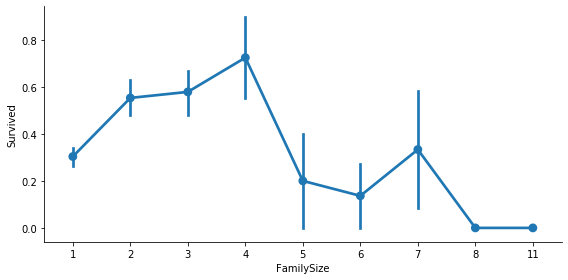

In [711]:
sns.catplot('FamilySize','Survived',data=train_data,kind='point',aspect=2,height=4)
plt.show()

In [768]:
#Create Is Alone
for dataset in datasets:
    dataset['IsAlone']=[1 if x==1 else 0 for x in dataset['FamilySize']]
    dataset['IsAlone']=dataset['IsAlone'].astype(int)
    
train_data[['IsAlone','Survived']].groupby('IsAlone').mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [773]:
train_data['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [772]:
train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [782]:
#It seems that multiple persons have the same ticket. Most likely, each family had 1 single ticket. We calculate fare per person
for dataset in datasets:
    dataset['FarePerPerson'] = dataset['Fare']/dataset['FamilySize']
    
train_data['FarePerPerson'].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: FarePerPerson, dtype: float64

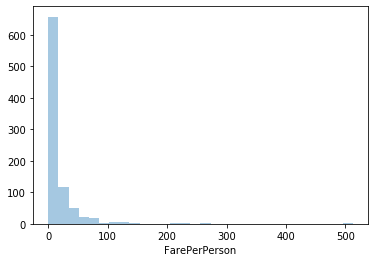

In [787]:
sns.distplot(train_data['FarePerPerson'],bins=30,label='Not Survived',kde=False)
plt.show()

In [789]:
#Create 2 categories: low and hight based on median value
for dataset in datasets:
    dataset.loc[dataset['FarePerPerson']<=8.3,'FarePerPerson']=1
    dataset.loc[dataset['FarePerPerson']>8.3,'FarePerPerson']=2

train_data[['FarePerPerson','Survived']].groupby('FarePerPerson').mean()

,Survived
FarePerPerson,
1.0,0.260090
2.0,0.507865


In [792]:
#Create Fare intervals

for dataset in datasets:
    dataset['FareBand'] = pd.qcut(dataset['Fare'], 4)
    
train_data[['FareBand','Survived']].groupby('FareBand').mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [793]:
#Create 4 categories
for dataset in datasets:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=1
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<14.454),'Fare']=2
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<31.0),'Fare']=3
    dataset.loc[dataset['Fare']>31.0,'Fare']=4
    dataset['Fare']=dataset['Fare'].fillna(0).astype(int)

train_data[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
1.0,0.197309
2.0,0.308756
3.0,0.442478
4.0,0.581081
31.0,0.666667


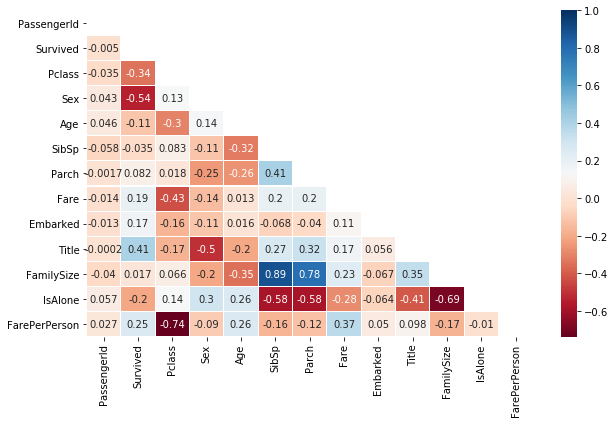

In [795]:
#Assess feature correlation
plt.subplots(figsize = (10,6))
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_data.corr(),annot=True,linewidths=0.1,cmap='RdBu',mask=mask)
plt.show()

In [797]:
#FarePerPerson is strongly correlated with Pclass => Remove FarePerPerson
#FamilySize is strongly correlated with SibSp, Parch => Remove FamilySize
#Remove PassengerId from train_data. It is required in test_data for submission

train_data.drop(['PassengerId','FarePerPerson','FamilySize','Name','Ticket','Cabin','FareBand'],axis=1,inplace=True)
test_data.drop(['FarePerPerson','FamilySize','Name','Ticket','Cabin','FareBand'],axis=1,inplace=True)

In [800]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,1,3,1,0,1,1,1,0
1,1,1,0,4,1,0,4,3,3,0
2,1,3,0,4,0,0,2,1,2,1
3,1,1,0,4,1,0,4,1,3,0
4,0,3,1,4,0,0,2,1,1,1


## Data Modelling

#### Since we are trying to predict whether a passager has survived or not, we have a problem of classification. 
#### Also, we want to identify how the independent features can influence the chance that a passager survives so we also have a regression problem.

#### As such, the following algorithms will be considered:

<ol>
<li>Logistic Regression</li>
<li>K-Nearest Neighbours</li>
<li>Suport Vector Machines (linear and radial kernels)</li>
<li>Naive Bayes</li>
<li>Decision Tree</li>
<li>Random Forest</li>
</ol>

In [811]:
#First create x_train, y_train, x_test

x_train=train_data.iloc[:,1:]
y_train=train_data['Survived']
x_test=test_data.iloc[:,1:]

In [899]:
#Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

logistic_scores = cross_val_score(logistic_model, x_train, y_train, cv=10, scoring = "accuracy")
logistic={'Model':'Logistic Regression','CV mean':logistic_scores.mean(), 'Std':logistic_scores.std()}

print('Train score: ',logistic_model.score(x_train,y_train))
print('CV score:    ',logistic_scores.mean())

Train score:  0.819304152637486
CV score:     0.8137078651685392


In [900]:
#Fit K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

knn_scores = cross_val_score(knn_model, x_train, y_train, cv=10, scoring = "accuracy")
knn={'Model':'K-NN','CV mean':knn_scores.mean(), 'Std':knn_scores.std()}

print('Train score: ',knn_model.score(x_train,y_train))
print('CV score:    ',knn_scores.mean())

Train score:  0.8597081930415263
CV score:     0.8260923845193509


In [908]:
#Fit Linear Suport Vector Machine
from sklearn import svm

svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

svm_scores = cross_val_score(svm_model, x_train, y_train, cv=10, scoring = "accuracy")
svm={'Model':'SVM', 'CV mean':svm_scores.mean(), 'Std':svm_scores.std()}

print('Train score: ',svm_model.score(x_train,y_train))
print('CV score:    ',svm_scores.mean())

Train score:  0.8159371492704826
CV score:     0.8091885143570536


In [947]:
#Fit Radial Suport Vector Machine
from sklearn import svm

rsvm_model=svm.SVC(kernel='rbf')
rsvm_model.fit(x_train,y_train)

rsvm_scores = cross_val_score(rsvm_model, x_train, y_train, cv=10, scoring = "accuracy")
rsvm={'Model':'RSVM', 'CV mean':rsvm_scores.mean(), 'Std':rsvm_scores.std()}

print('Train score: ',rsvm_model.score(x_train,y_train))
print('CV score:    ',rsvm_scores.mean())

Train score:  0.8372615039281706
CV score:     0.8271660424469414


In [903]:
#Fit Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

nb_scores = cross_val_score(nb_model, x_train, y_train, cv=10, scoring = "accuracy")
nb={'Model':'Naive Bayes', 'CV mean':nb_scores.mean(), 'Std':nb_scores.std()}

print('Train score: ',nb_model.score(x_train,y_train))
print('CV score:    ',nb_scores.mean())

Train score:  0.8024691358024691
CV score:     0.8013358302122346


In [904]:
#Fit Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

tree_scores = cross_val_score(tree_model, x_train, y_train, cv=10, scoring = "accuracy")
tree={'Model':'Decision Tree', 'CV mean':tree_scores.mean(), 'Std':tree_scores.std()}

print('Train score: ',tree_model.score(x_train,y_train))
print('CV score:    ',tree_scores.mean())

Train score:  0.898989898989899
CV score:     0.7924469413233457


In [905]:
#Fit Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier()
forest_model.fit(x_train,y_train)

forest_scores = cross_val_score(forest_model, x_train, y_train, cv=10, scoring = "accuracy")
forest={'Model':'Random Forest','CV mean':forest_scores.mean(), 'Std':forest_scores.std()}

print('Train score: ',forest_model.score(x_train,y_train))
print('CV score:    ',forest_scores.mean())

Train score:  0.898989898989899
CV score:     0.8104244694132333


In [919]:
models=[logistic, knn, svm, rsvm, nb, tree, forest]

cv_scores=pd.DataFrame()
for model in models:
    cv_scores=cv_scores.append(model,ignore_index=True)  

cv_scores=cv_scores.set_index('Model').sort_values('CV mean', ascending=False)
cv_scores

,CV mean,Std
Model,,
RSVM,0.827166,0.032607
K-NN,0.826092,0.048006
Logistic Regression,0.813708,0.028397
Random Forest,0.810424,0.053706
SVM,0.809189,0.024199
Naive Bayes,0.801336,0.022017
Decision Tree,0.792447,0.051362


In [926]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

hyper={'C':C,'gamma':gamma}
hyper_rsvm=GridSearchCV(estimator=svm.SVC(kernel='rbf'),param_grid=hyper,verbose=True,cv=10)
hyper_rsvm.fit(x_train,y_train)
print(hyper_rsvm.best_score_)
print(hyper_rsvm.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8429088639201
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   14.9s finished


In [954]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]

hyper={'leaf_size':leaf_size,'n_neighbors':n_neighbors,'p':p}
hyper_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,verbose=True,cv=10)
hyper_knn.fit(x_train,y_train)
print(hyper_knn.best_score_)
print(hyper_knn.best_estimator_)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8272284644194757
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 3420 out of 3420 | elapsed:   36.8s finished


In [955]:
n_estimators=range(100,1000,100)
max_depth=[80,100]
min_samples_leaf=range(3,10)
min_samples_split=[2, 3, 10]
min_samples_leaf=[1, 3, 10]


hyper={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
hyper_forest=GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyper, verbose=True, cv=10, n_jobs= 4)
hyper_forest.fit(x_train,y_train)
print(hyper_forest.best_score_)
print(hyper_forest.best_estimator_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1620 out of 1620 | elapsed:  4.6min finished


0.8361922596754058
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


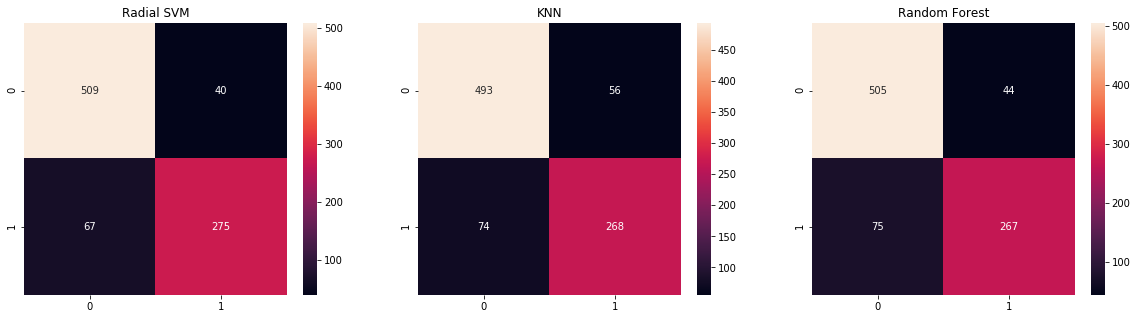

In [957]:
from sklearn.metrics import confusion_matrix

f,ax=plt.subplots(1,3, figsize=(20,5))

y_pred_rsvm=hyper_rsvm.best_estimator_.predict(x_train)
y_pred_knn=hyper_knn.best_estimator_.predict(x_train)
y_pred_forest=hyper_forest.best_estimator_.predict(x_train)

sns.heatmap(confusion_matrix(y_train,y_pred_rsvm), annot=True,fmt='2.0f',ax=ax[0])
sns.heatmap(confusion_matrix(y_train,y_pred_knn), annot=True,fmt='2.0f',ax=ax[1])
sns.heatmap(confusion_matrix(y_train,y_pred_forest), annot=True,fmt='2.0f',ax=ax[2])
ax[0].set_title('Radial SVM')
ax[1].set_title('KNN')
ax[2].set_title('Random Forest')
plt.show()

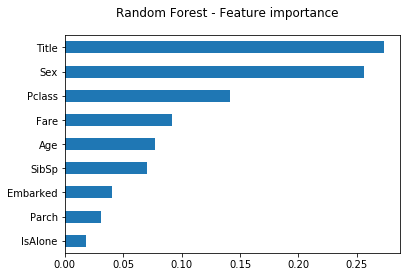

In [964]:
#Get feature importance
pd.Series(hyper_forest.best_estimator_.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh()
fig=plt.gcf()
fig.suptitle('Random Forest - Feature importance')
plt.show()

In [970]:
y_pred_rsvm=hyper_rsvm.best_estimator_.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_rsvm
    })
submission.to_csv('C:/Users/Victor/Documents/Python Courses/Kaggle/Titanic/submission.csv', index=False)